# Data Scientist Associate Practical Exam

## Company Background
GoalZone is a fitness club chain providing five types of fitness classes in Canada. Finally, the fitness classes schedule is back to normal after the COVID-19 restrictions are lifted. However, they have received many complaints from the customers about having a hard time booking a fitness class.

From initial analysis, the program operation team found out that the fitness classes are always fully booked but are having a low attendance rate per class. To improve this situation, they would like to increase the class capacity for customers to sign up if a low attendance rate is predicted.  


## Customer Question
The operation manager has asked you to answer the following:
- Can you predict the attendance rate for each fitness class? 



## Dataset
The dataset contains the attendance information for the class scheduled this year so far. 

| Column Name                     | Criteria                                                                                                                                                                        |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Day of Week                     | Character, the day of the week the class was scheduled, one of values from “Mon” to “Sun”.                                                                                      |
| Time                            | Character, the time of the day the class was scheduled, either "AM" or "PM".                                                                                                        |
| Class Category                  | Character, the category of the fitness class, one of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”.                                                                          |
| Days Before                     | Numeric, number of days the class stayed fully booked, maximum five days.                                                                                                       |
| Class Capacity                  | Numeric, maximum number of members can sign up for that class, either 15 or 25.  The class capacity being 26 needs to be updated to 25.                                         |
| Attendance                      | Numeric, number of members actually attended the class.                                                                                                                         |
| Average Age                     | Numeric, average age of the members signing up for that class.  Remove rows that average age is smaller than 14 because group fitness class are for members aged 14 and older.  |
| Number of New Students          | Numeric, number of new students signing up for this class.                                                                                                                      |
| Number of Members Over 6 months | Numeric, number of members signing up for the class have been joining the club more than 6 months.                                                                              |                                                                                     |

# Data Scientist Associate Practical Exam Submission




In [1]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above
# Start coding here... 
import pandas as pd
import numpy as np

df = pd.read_csv("fitness_class.csv") #reading the csv file
df.head() #printing the first 5 observations

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
0,Wed,AM,Yoga,15,1,8,31.1,6,4
1,Sun,PM,Aqua,15,3,8,27.0,7,8
2,Mon,AM,Aqua,15,5,10,22.4,8,7
3,Sun,PM,Strength,25,3,18,23.5,7,9
4,Mon,AM,Yoga,15,5,10,29.8,5,7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week     765 non-null    object 
 1   time            765 non-null    object 
 2   class_category  765 non-null    object 
 3   class_capacity  765 non-null    int64  
 4   days_before     765 non-null    int64  
 5   attendance      765 non-null    int64  
 6   age             765 non-null    float64
 7   new_students    765 non-null    int64  
 8   over_6_month    765 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 53.9+ KB


* According to this information of the dataframe df loaded by reading the "fitness_class.csv" data file, 3 first variables meet the given criteria concerning their data types "object". For the rest of the remaining features, there is only age recorded under float64 form whereas others are in int64.
* Moreover, the data was recorded completely with 765 observations without any missing number.    

## Data Validation



In [3]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data
# Data Validation for numerical variables
df.describe()

,class_capacity,days_before,attendance,age,new_students,over_6_month
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,17.542484,2.547712,9.563399,29.092680,5.917647,7.577778
std,4.365481,1.355379,3.896598,5.912063,1.789224,1.974518
min,15.000000,1.000000,4.000000,8.300000,1.000000,2.000000
25%,15.000000,1.000000,7.000000,25.300000,5.000000,6.000000
50%,15.000000,2.000000,9.000000,29.000000,6.000000,8.000000
75%,25.000000,4.000000,11.000000,33.200000,7.000000,9.000000
max,26.000000,5.000000,21.000000,48.800000,11.000000,13.000000


In [4]:
df['class_capacity'].mean() - df['attendance'].mean() #average absence

7.979084967320263

* From the description below for numeric variables, it is witnessed that there exists the value 26 for the 'class_capacity', which needs to be converted to 25 as requirement.
* Also, there is a large gap between the mean of 'class_capacity' and that of attendance (approximately 8), which indiates a significant average number of absence in the classes. 
* Concerning the 'age' feature, its minimum value (8.3) shows a difference with the required age (14).
* The criteria is met with 'days_before' with maximum 5 days.

In [5]:
# Data Validation for categorical variables
cat_cols = df.columns[:4] # 3 first columns of df contains caregorical variables and the the 4th one consists of low uniqueness of numerical data type.
for col in cat_cols:
    print("Uniqueness of {} column: {} \n".format(col, df[col].unique()))

Uniqueness of day_of_week column: ['Wed' 'Sun' 'Mon' 'Tue' 'Thu' 'Sat' 'Fri'] 

Uniqueness of time column: ['AM' 'PM'] 

Uniqueness of class_category column: ['Yoga' 'Aqua' 'Strength' 'HIIT' 'Cycling'] 

Uniqueness of class_capacity column: [15 25 26] 



* As can be seen, all categorial columns meet their corresponding criteria in terms of unique values.

In [2]:
# Data Modification
df['class_capacity'].replace(26,25, inplace =True)#convert 26 to 25 using replace
df['class_capacity'].unique()

array([15, 25])

In [3]:
df = df[df['age']>=14] # select rows that containing age at least equal to 14
df['age'].describe()

count    762.000000
mean      29.163648
std        5.812547
min       14.000000
25%       25.300000
50%       29.000000
75%       33.200000
max       48.800000
Name: age, dtype: float64

* After removing data, there is only a negligible number of observations (3) being deleted from the original dataframe. Therefore, the sufficient amount of data for the quality of analysis and modeling tasks is assured.

## Exploratory Analysis



In [4]:
#importing libraries for visualizations and setting style & context for figures.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
#sns.set_context('notebook')

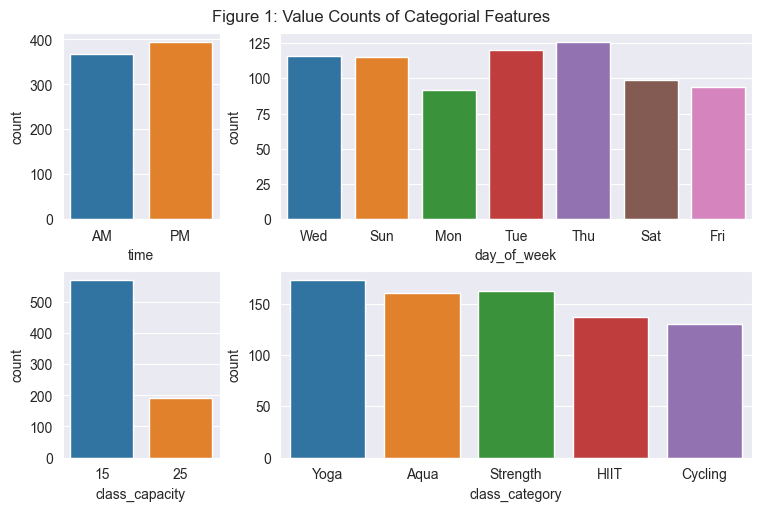

In [17]:
fig, ax = plt.subplots(2,2, figsize=(7.5,5), constrained_layout = True,
                       gridspec_kw={'width_ratios': [1,3]})
fig.suptitle('Figure 1: Value Counts of Categorial Features')
sns.countplot(x='time', data=df, ax=ax[0][0])
sns.countplot(x='day_of_week', data=df, ax=ax[0][1])
sns.countplot(x='class_capacity',data=df, ax=ax[1][0])
sns.countplot(x='class_category', data=df, ax=ax[1][1])
plt.show()

* As can be seen in the Figure 1, a high balance is witnessed in the recorded number of unique values in 'time', 'day_of_week' and 'class_category' feature, which is potentially important to produce analysis comparison between those values with the third variable.
* The only high skewness is observed in 'class_capacity' in which the capacity of 15 is nearly 3 times greater than that of 25. 

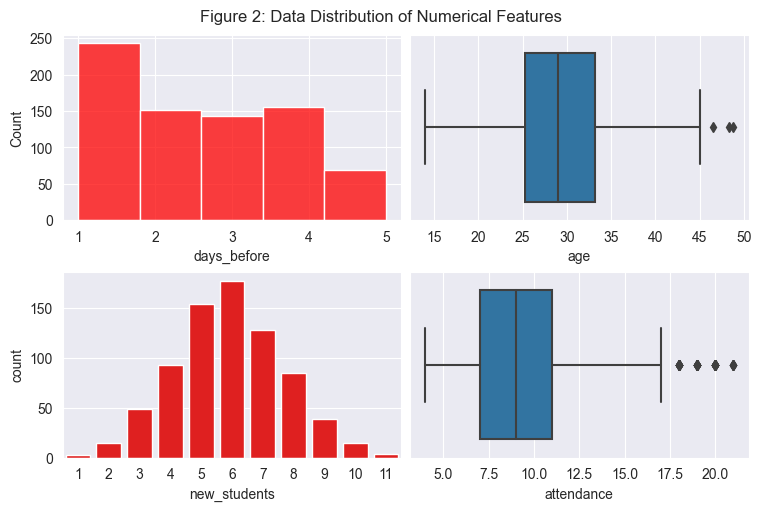

In [10]:
fig, ax = plt.subplots(2,2, figsize=(7.5,5),constrained_layout = True)
fig.suptitle('Figure 2: Data Distribution of Numerical Features')
sns.histplot(x='days_before', data=df, bins=5, ax=ax[0][0], color='red')
sns.boxplot(x='age', data=df, ax=ax[0][1])
sns.countplot(x='new_students', data=df, ax=ax[1][0], color='red')
sns.boxplot(x='attendance',data=df, ax=ax[1][1])
plt.show()

* In the first subplot of Figure 2 demonstrating the data allocation of 5 distinct values of 'days_before', a closely equivalent number of values (around 150) is witnessed for 2, 3 and 4 days while the highest and lowest ones are for the first 1 day and the last 5 days respectively with about 230 and 70 counts.
* The 'new_students' follows Normal Distribution with highest mean and spreading regions are located in 5,6 and 7 new students.
* For features with larger uniqueness, their interquartile ranges are positionned in around [25,33] for 'age' and [7.5, 11.5] for 'attendance'.
* Regarding the 'attendance' variable, its range depends also on the maximum capacity so it is necessary to plot it with more added variables to be able to analyse more carefully.
 
--> For this reason, it is also important to extract new 'attendance_rate' from 'attendance' and 'class_capacity'. 

In [5]:
#extracting new concerned target feature from attendance and class_capacity
df['attendance_rate'] = df['attendance']/df['class_capacity'] 

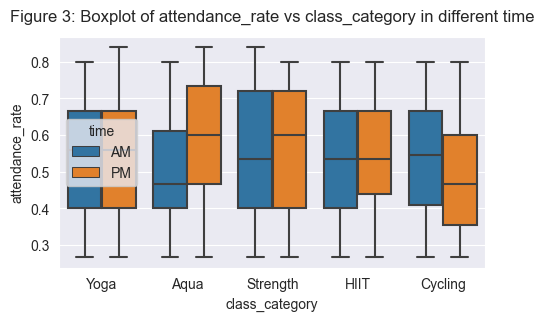

In [90]:
# Figures with higher dimensional consideration
plt.figure(figsize=(5.5, 3))
box = sns.boxplot(
    x='class_category',y='attendance_rate',
    data=df,
    hue='time')
box.set_title('Figure 3: Boxplot of attendance_rate vs class_category in different time', y=1.03)
plt.show()


* Figure 3 generally shows a quasi-balanced distribution in 'attendance_rate' for all categories of fitness class with mean value around 0.5.
* Particularly regarding 2 categories for 'time' of day, there are only 'Aqua' and 'Strength' classes showing a higher allocation in the afternoon with median around 0.6 whereas 'Yoga' and 'HIIT' possess a nearly similar distribution of 'AM' and 'PM' time slot.

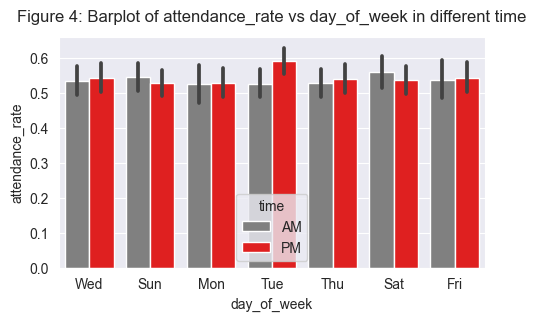

In [91]:
plt.figure(figsize=(5.5, 3))
bar = sns.barplot(
    x='day_of_week',y='attendance_rate',
    data=df,
    hue='time', palette=['grey','red'])
bar.set_title('Figure 4: Barplot of attendance_rate vs day_of_week in different time', y=1.03)
plt.show()

* Moreover, the quasi-balanced pattern is witnessed also in the mean of 'attendance_rate' (approximately 0.53) for all types of day with a nearly similar range of 95% confident interval.
* Similar to the previous relation with 'class_category', 'time' of day has a low impact on 'attendance_rate'. 

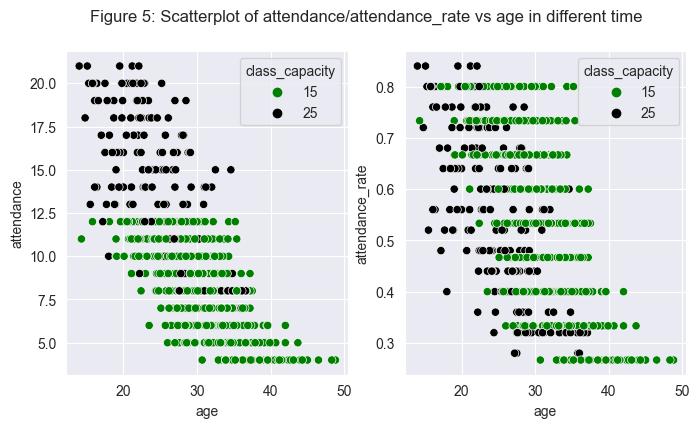

In [92]:
fig, ax = plt.subplots(1,2,figsize=(8, 4.2))
fig.suptitle('Figure 5: Scatterplot of attendance/attendance_rate vs age in different time')
sns.scatterplot(x='age',y='attendance', data=df, ax=ax[0],
    hue='class_capacity', palette={15:'green', 25:'black'})
sns.scatterplot(x='age',y='attendance_rate', data=df, ax=ax[1],
    hue='class_capacity', palette={15:'green', 25:'black'})
#,style='class_category')
#scatter.set_title('Figure 5: Scatterplot of attendance vs age in different time', y=1.03)
plt.show()

* As can be seen in Figure 5, 'age' has a strong negative linear relation with both 'attendance' and 'attendance_rate' but it is a bit clearer for 'attendance'.
* Notably, there is a higher distribution of class_capacity 15 for aged people ranging from 25 to 50, which is strongly differentiated with the class_capacity 25 for younger ones from 14 to 30 years old. These are clearly separated with 2 types of 'class_capacity' since this feature is the upper bound for 'attendance'.
* When being converted into 'attendance_rate', this separation no longer exists and both of these categories scatter more evenly throughout the range of 'attendance_rate'.  
* This also illustrates that there is always absence in all the classes because there is only maximum 0.8 and 0.83 of the clas witnessed in the 'attendance_rate' of 15 and 25 'class_capacity' respecitvely.

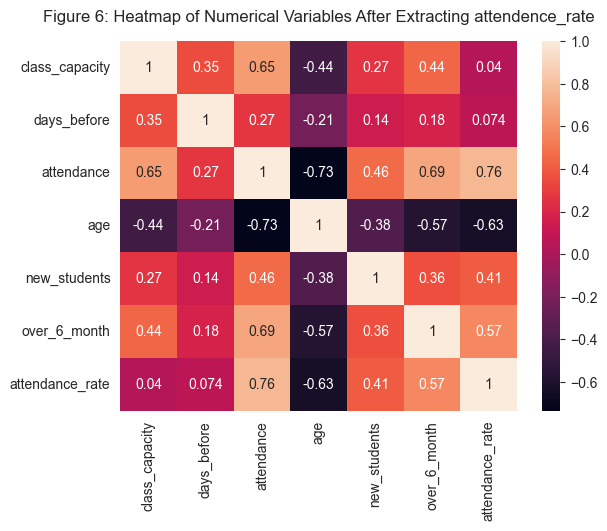

In [89]:
sns.heatmap(df.corr(), annot=True).set_title(
    'Figure 6: Heatmap of Numerical Variables After Extracting attendence_rate',y=1.03)
plt.show()

* Figure 6 demonstrates that the newly extracted variable has lower correlation with 'new_students' and 'over_6_month' with 0.41 and 0.57 compared to 0.46 and 0.69 respectively. This potentially can reduce the performance of model fitting. However, this desired requested target feature can also be influenced by categorial ones. 
* Among the concerned numerical features, only 'age' has a considerable negative coefficient with 'attendence_rate'.
* These characteristics are strongly proved by the Pairplot in the Figure 7 below. Indeed, there is a moderate correlation relation of 'attendance' with 'over_6_month' and 'new_student' whereas a strong one is represented in its negative correlation with 'age'. Moreover, apart from the left-skewed distribution of 'attendance', that of other concerned features have a pattern of Normal Distribution.
--> For these reasons, these parameters should be kepted for the next model-fitting section.

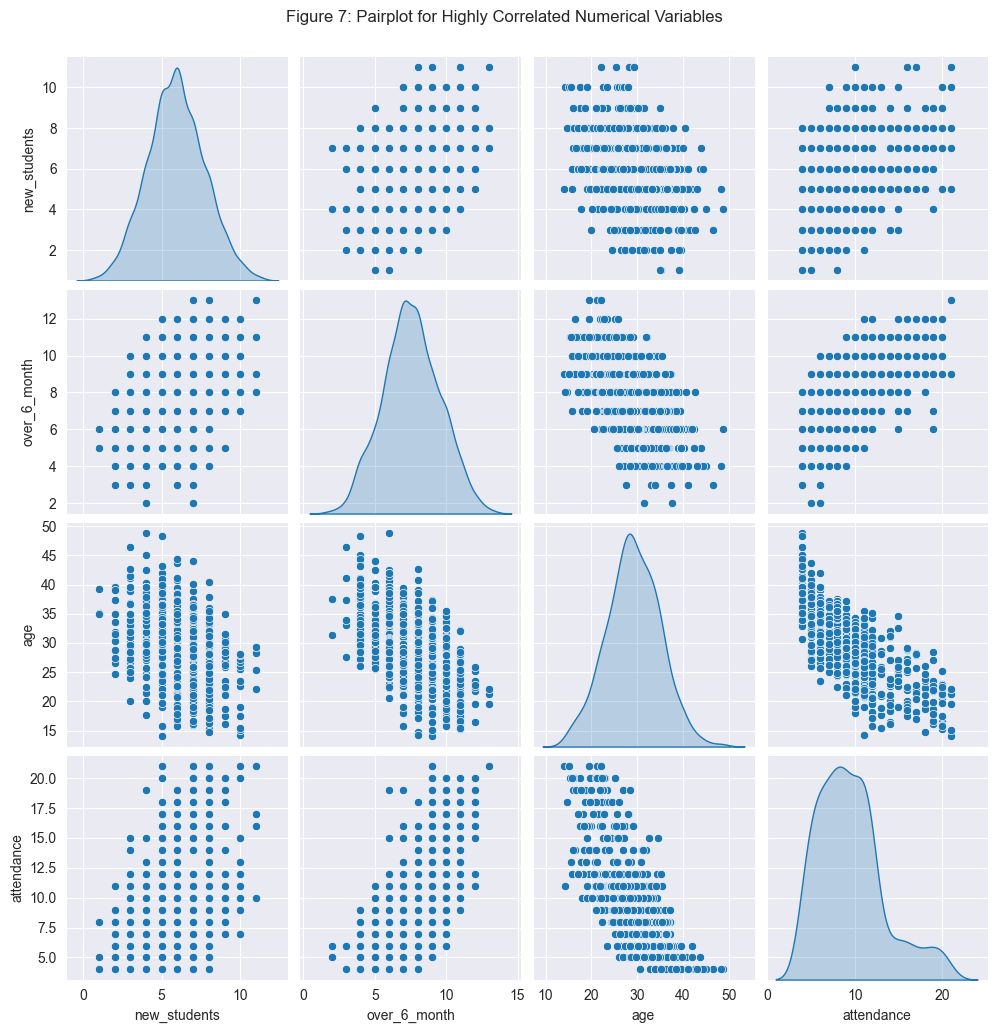

In [94]:
sns.pairplot(data=df[['new_students','over_6_month','age','attendance']],
             diag_kind='kde').fig.suptitle('Figure 7: Pairplot for Highly Correlated Numerical Variables', y=1.03)
plt.show()

## Model Fitting



In [24]:
# Feature Selection
df['capacity_cat'] = df['class_capacity'].replace({15:1, 25:2})
selected_cols=['day_of_week','time','class_category','new_students','over_6_month','age','capacity_cat','attendance']
df_model = df[selected_cols]
df_model.head()

,day_of_week,time,class_category,new_students,over_6_month,age,capacity_cat,attendance
0,Wed,AM,Yoga,6,4,31.1,1,8
1,Sun,PM,Aqua,7,8,27.0,1,8
2,Mon,AM,Aqua,8,7,22.4,1,10
3,Sun,PM,Strength,7,9,23.5,2,18
4,Mon,AM,Yoga,5,7,29.8,1,10


In [25]:
## 2 types of categorial datatype handler:
#label_encoder
from sklearn.preprocessing import LabelEncoder
df_le = df_model.copy()
le = LabelEncoder()
for cat_col in selected_cols[:3]:
    df_le[cat_col] = le.fit_transform(df_le[cat_col])
df_le.head()
#onehot_encoder
df_dm = df_model.copy()
df_dm = pd.get_dummies(df_dm)
df_dm.head()

,new_students,over_6_month,age,capacity_cat,attendance,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_AM,time_PM,class_category_Aqua,class_category_Cycling,class_category_HIIT,class_category_Strength,class_category_Yoga
0,6,4,31.1,1,8,0,0,0,0,0,0,1,1,0,0,0,0,0,1
1,7,8,27.0,1,8,0,0,0,1,0,0,0,0,1,1,0,0,0,0
2,8,7,22.4,1,10,0,1,0,0,0,0,0,1,0,1,0,0,0,0
3,7,9,23.5,2,18,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,5,7,29.8,1,10,0,1,0,0,0,0,0,1,0,0,0,0,0,1


* There are 2 types of numerical converter I would like make a comparision to show which one give a higher performance.
* As can be seen, the LabelEncoder converts categorial variables into integer ones ordered from 1, this could possibly make a significant influence on the weight of each sample. Whereas get_dummies uses 1 to denote the presence of each unique value facilitated by creating more variable.
* From the exploratory data analyse presented in the previous section, the Linear Regression is selected as the baseline model to deal with multiple linear relations with the target 'attendance'. Here, since the extracted 'attendance_rate' has lower linear correlations with other numerical features compared to that of the original 'attendance'. Therfore, in order to both produce a high model performance and predict the 'attendance_rate', 'attendance' would still be used for model fitting section and the rate will be calculated after by dividing by 'class_capacity' which is always presented as a recordable feature in reality for each observation.
* However, as their correlation coefficients does not have a high value, more complex model 'RandomForestRegressor' is applied as an ensemple method used to potentially cope with those comlex relations.  

In [37]:
## Model Evaluation by Cross Validation Score method
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
std_scaler = StandardScaler() 
#standardScaler to bring the scale of variables closer to facilitate the machine learning section
model_dict = {'LinRegress':LinearRegression(), 
              'RandomForest':RandomForestRegressor(random_state=6199)}
def model_cvs(data, data_cat):
    y = data['attendance'] # dependent features
    X = data.drop('attendance', axis=1) #independent feature
    X_scaled =  std_scaler.fit_transform(X) #fit & transform the standard Scaler
    kf = KFold(n_splits =5, shuffle=True, random_state=6199) 
    #folding the dataset into 5 sub-sections to be able to measure the performance to reduce bias 
    print('CVS for {}:'.format(data_cat))
    for name, model in model_dict.items():
        r2_cvs = cross_val_score(model, X, y, cv=kf)
        print('Model {} has r2 cross_val_score: {} with mean: {:.3f} \n'.format(name, r2_cvs, np.mean(r2_cvs)))

model_cvs(df_le, 'LabelEncoder')
model_cvs(df_dm, 'OneHotEncoder')

CVS for LabelEncoder:
Model LinRegress has r2 cross_val_score: [0.76667134 0.77341021 0.74887758 0.71339616 0.73269239] with mean: 0.747 

Model RandomForest has r2 cross_val_score: [0.72217669 0.71182716 0.71142678 0.71409284 0.72713621] with mean: 0.717 

CVS for OneHotEncoder:
Model LinRegress has r2 cross_val_score: [0.75631674 0.76713738 0.74393128 0.71382633 0.73605963] with mean: 0.743 

Model RandomForest has r2 cross_val_score: [0.72277613 0.71190767 0.70352525 0.72096617 0.73298566] with mean: 0.718 



* As can be seen in the cross_val_score results, the models genreally give relatively high coefficients of determination for prediction of 'attendance' target feature with over 70%. 
* In particular, the simple Linear Regression is still capable of providing a higher r2 score (0.74) compared to that of RandomForestRegressor with only around 0.717. This could be explained by the strong impact of Linear Regression method to deal with mainly moderate to strong linear relations with 3 features 'age', 'new_students' and 'over_6_month'. RadomForestRegressor, even containing higher complexity but it's training methodology is based on classification with multiple sub-DecisionTree, which is potentially weaker to be able to capture the linear relations. 
* Concerning Encoder methods, Labelencoder presents a higher stability in all the values of cross_val_score.
--> For these reasons, LinearRegression and LabelEncoder are selected as model and encoding preprocessing method respectively in this context. 

## Model Evaluation



In [40]:
# Model Evaluation
# Choose a metric and evaluate the performance of the two models
from sklearn.metrics import mean_squared_error
selected_model = LinearRegression()
y = df_le['attendance']
X = df_le.drop('attendance', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=6199)
selected_model.fit(X_train, y_train)
y_pred = selected_model.predict(X_test)
r2_score = selected_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('On splitted dataset, the selected model has r2 score: {:.3f} with RMSE: {:.3f} \n'.format(r2_score, rmse))

On splitted dataset, the selected model has r2 score: 0.767 with RMSE: 1.864 



* Root Mean Squared was selected for model evaluation since its value has the same unit with the target feature, which can facilitate the evaluation on how far the model can predict wrongly compared to the desired value.
* As can be seen in the model performance of the seleted model and selected preprocessing encoder, r2 score is obtained with relatively high coefficient (7.67) while RMSE of 1.864 shows a low expected attendance error range compared to the maximum capacity of 15 or 25. 

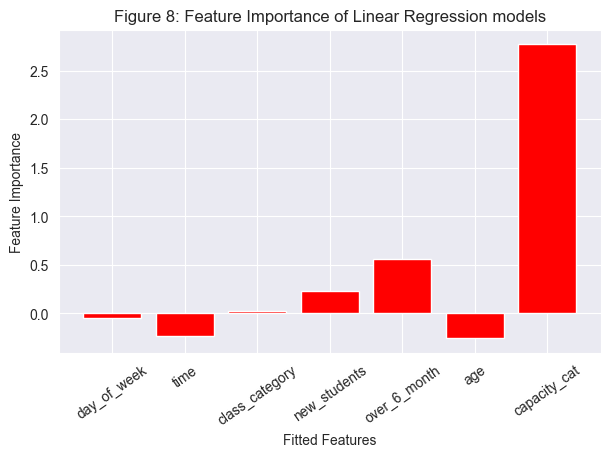

In [50]:
feature_importance = selected_model.coef_
fitted_features = selected_model.feature_names_in_
plt.figure(figsize=(7,4.2))
plt.bar(fitted_features, feature_importance, color='red')
plt.xlabel('Fitted Features')
plt.ylabel('Feature Importance')
plt.title('Figure 8: Feature Importance of Linear Regression model')
plt.xticks(rotation = 35)
plt.show()

* This Figure reflects the categorial separation of 'class_capacity' presented in Figure 5; however, this significantly high coefficient given to the 'capacity_cat' compared to the low correlation witnessed in Figure 6 indicates a strong impact of categorial conversion for this feature.
* Moreover, 'age' represents a negative linear relation with the target by the negative coefficient.
* Additionally, 'over_6_month' and 'new_students' even has a moderate coefficient but they still have significantly lower coefficients compared to that of the extracted 'capacity_cat'.
* Finally, based on the constructed model, the desired target 'attendance_rate' can be inferred from the predicted 'attendance' and the maximum 'class_capacity' which is available information for each class.